# K Means Clustering with Python

** Credit: [Pieriandata.com](http://www.pieriandata.com) **

## Import Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import Imputer

## NO NEED - Create some Data 

In [2]:
from sklearn.datasets import make_blobs

In [5]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

## read my data (OR)

In [11]:
data2 = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')
data2.head()

,SUBJECTn,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,CDR3_AA_GRAVY.quter,CDR3_AA_GRAVY.tail,CDR3_AA_LENGTH.mean,CDR3_AA_LENGTH.str,CDR3_AA_LENGTH.quter,CDR3_AA_LENGTH.tail,CDR3_AA_POLARITY.mean,CDR3_AA_POLARITY.str,CDR3_AA_POLARITY.quter,CDR3_AA_POLARITY.tail
0,BC_10,Healthy,NaN,0.220240,0.023630,0.459240,0.232679,0.055238,0.008488,0.000484,...,-1.0,-0.17333333333333306,15.566583363084613,3.8140400573600988,13.0,18.0,8.413516101784207,0.5214524393531481,8.04705882352941,8.75454545454545
1,BC_11,Healthy,NaN,0.209268,0.026029,0.476099,0.235566,0.044202,0.008683,0.000154,...,-0.995833333333333,-0.123076923076923,15.436090515166105,3.6172652136720735,13.0,18.0,8.482599018559231,0.49800555512505285,8.13529411764706,8.805882352941179
2,BC_12,Healthy,NaN,0.205156,0.024936,0.415683,0.298063,0.031972,0.010342,0.013848,...,-0.986666666666667,-0.1459935897435895,16.115639999005246,4.112519249025375,13.0,19.0,8.439949841021718,0.4908470198259828,8.1,8.75333333333333
3,BC_13,Healthy,NaN,0.201297,0.046151,0.420261,0.275598,0.049830,0.006616,0.000247,...,-1.0,-0.12222222222222195,15.440365905091548,3.732484244150953,13.0,18.0,8.470984259102124,0.5001470227375485,8.125,8.79375
4,BC_14,Healthy,NaN,0.246696,0.021840,0.452630,0.223807,0.046810,0.007985,0.000231,...,-0.963157894736842,-0.123076923076923,15.976363377474014,3.9563694966376097,13.0,19.0,8.441183495909993,0.4968433667652791,8.091205533596842,8.76


In [12]:
data = data2.drop(['SUBJECTn', 'CLIN','SEX'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,D1,D2,D3,...,CDR3_AA_GRAVY.quter,CDR3_AA_GRAVY.tail,CDR3_AA_LENGTH.mean,CDR3_AA_LENGTH.str,CDR3_AA_LENGTH.quter,CDR3_AA_LENGTH.tail,CDR3_AA_POLARITY.mean,CDR3_AA_POLARITY.str,CDR3_AA_POLARITY.quter,CDR3_AA_POLARITY.tail
0,0.220240,0.023630,0.459240,0.232679,0.055238,0.008488,0.000484,0.133699,0.151160,0.300306,...,-1.0,-0.17333333333333306,15.566583363084613,3.8140400573600988,13.0,18.0,8.413516101784207,0.5214524393531481,8.04705882352941,8.75454545454545
1,0.209268,0.026029,0.476099,0.235566,0.044202,0.008683,0.000154,0.124637,0.160695,0.315577,...,-0.995833333333333,-0.123076923076923,15.436090515166105,3.6172652136720735,13.0,18.0,8.482599018559231,0.49800555512505285,8.13529411764706,8.805882352941179
2,0.205156,0.024936,0.415683,0.298063,0.031972,0.010342,0.013848,0.115506,0.188673,0.304105,...,-0.986666666666667,-0.1459935897435895,16.115639999005246,4.112519249025375,13.0,19.0,8.439949841021718,0.4908470198259828,8.1,8.75333333333333
3,0.201297,0.046151,0.420261,0.275598,0.049830,0.006616,0.000247,0.114462,0.140038,0.308023,...,-1.0,-0.12222222222222195,15.440365905091548,3.732484244150953,13.0,18.0,8.470984259102124,0.5001470227375485,8.125,8.79375
4,0.246696,0.021840,0.452630,0.223807,0.046810,0.007985,0.000231,0.100165,0.174898,0.322799,...,-0.963157894736842,-0.123076923076923,15.976363377474014,3.9563694966376097,13.0,19.0,8.441183495909993,0.4968433667652791,8.091205533596842,8.76


## Visualize Data

In [14]:
#my data
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

KeyError: 0

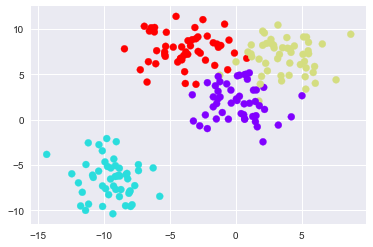

In [4]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4)

In [7]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [9]:
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2, 2,
       1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3, 2, 0,
       3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 3, 3, 0, 1,
       0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3, 2, 1, 1, 3, 0, 3,
       0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0,
       2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0, 1, 2])

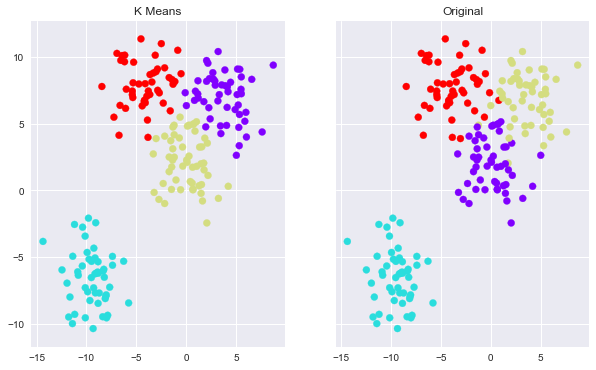

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.